C:\Users\shivam pal\AppData\Local\Temp\ipykernel_2980\1967825323.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)
C:\Users\shivam pal\AppData\Local\Temp\ipykernel_2980\1967825323.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values


✅ Numeric Columns:
['request_id', 'trip_cost', 'extra_tip', 'driver_id']


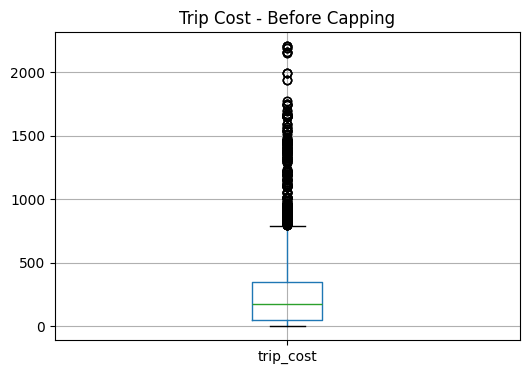

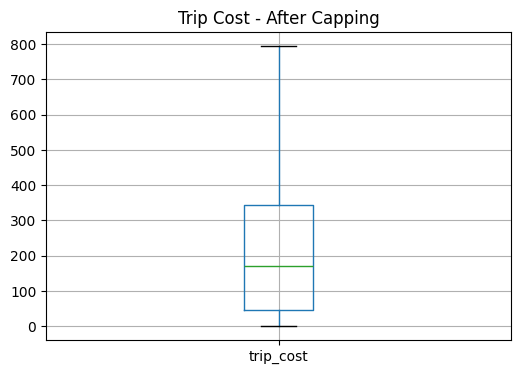


✅ Summary Statistics:
        request_id              request_timestamp  \
count   6744.00000                           6744   
mean    7758.50000  2021-09-04 09:00:42.155990528   
min     4387.00000            2021-07-13 00:02:14   
25%     6072.75000  2021-07-14 07:38:50.750000128   
50%     7758.50000            2021-07-15 13:45:43   
75%     9444.25000            2021-11-07 19:00:00   
max    11130.00000            2021-12-07 23:54:00   
std     1946.96944                            NaN   

                     start_timestamp                 drop_timestamp  \
count                           6744                           6744   
mean   2021-08-22 04:18:52.026690304  2021-09-19 21:13:15.821618944   
min              2021-07-13 00:12:48            2021-07-13 00:26:14   
25%              2021-07-13 12:39:41  2021-07-14 19:24:46.249999872   
50%              2021-07-14 18:54:08            2021-11-07 09:16:30   
75%    2021-11-07 08:47:54.750000128            2021-11-07 19:01:00   
ma

In [ ]:
# UBER RIDE TRIP ANALYSIS PROJECT (Reading & Visualization in Python)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
url = "https://gitlab.crio.do/me_notebook/me_jupyter_uberanalysis/-/raw/master/Uber_ride_analysis_dataset.csv"
df = pd.read_csv(url, skiprows=[1])
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Handle missing values
df.dropna(subset=['trip_status', 'trip_cost'], inplace=True)
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)
df['driver_id'].fillna(-1, inplace=True)

# Drop rows with missing timestamps for completed trips
df = df[~(
    (df['trip_status'] == 'Trip Completed') &
    (df[['start_timestamp', 'drop_timestamp']].isna().any(axis=1))
)]

# Fill remaining timestamps with mode (optional)
df['start_timestamp'].fillna(df['start_timestamp'].mode()[0], inplace=True)
df['drop_timestamp'].fillna(df['drop_timestamp'].mode()[0], inplace=True)

# Convert to datetime
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], errors='coerce')
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], errors='coerce')
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'], errors='coerce')

# Numeric Columns
print("\n✅ Numeric Columns:")
print(df.select_dtypes(include='number').columns.tolist())

# Plot boxplot for trip_cost
plt.figure(figsize=(6, 4))
df.boxplot(column='trip_cost')
plt.title('Trip Cost - Before Capping')
plt.grid(True)
plt.show()

# Cap trip_cost outliers
Q1 = df['trip_cost'].quantile(0.25)
Q3 = df['trip_cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['trip_cost'] = np.where(df['trip_cost'] > upper_bound, upper_bound, df['trip_cost'])

# Cap extra_tip outliers
Q1_tip = df['extra_tip'].quantile(0.25)
Q3_tip = df['extra_tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip
upper_tip = Q3_tip + 1.5 * IQR_tip
df['extra_tip'] = np.where(df['extra_tip'] > upper_tip, upper_tip, df['extra_tip'])

# Boxplot after capping
plt.figure(figsize=(6, 4))
df.boxplot(column='trip_cost')
plt.title('Trip Cost - After Capping')
plt.grid(True)
plt.show()

# Summary statistics
print("\n✅ Summary Statistics:")
print(df.describe())
